# TUGAS 12
Cetta Maulana A<br>
1103213119<br>
CNN Modern<br>
NiN<br>
CIFAR10<br>
[ChatGPT](https://chatgpt.com/share/f398d823-086f-4a13-9008-017cc739172c)

In [1]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2024-06-19 15:07:46.610357: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
for i in range(1,6):
    path = 'data_batch_' + str(i)
    with open(path, mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
    if i == 1:  
        x_train = (batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)).astype('float32')
        y_train = batch['labels']
    else:
        x_train_temp = (batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)).astype('float32')
        y_train_temp = batch['labels']
        x_train = np.concatenate((x_train,x_train_temp),axis = 0)
        y_train = np.concatenate((y_train,y_train_temp),axis=0)

path = 'test_batch'
with open(path,'rb') as file:
    # note the encoding type is 'latin1'
    batch = pickle.load(file, encoding='latin1')
    x_test = (batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)).astype('float32')
    y_test = batch['labels']

x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)


In [3]:
# Define the Network in Network model
model = Sequential()

# MLPConv Layer 1
model.add(Conv2D(192, (5, 5), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(160, (1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(96, (1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(Dropout(0.5))

# MLPConv Layer 2
model.add(Conv2D(192, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(192, (1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(192, (1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(Dropout(0.5))

# MLPConv Layer 3
model.add(Conv2D(192, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(192, (1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(10, (1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Softmax Output
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-06-19 15:07:56.036629: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-19 15:07:56.108994: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-19 15:07:56.109138: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-1

In [4]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 192)    │        14,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 160)    │        30,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 160)    │           640 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 160)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 96)     │        15,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 192)    │       460,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 192)    │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 192)    │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 192)    │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 8, 8, 192)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 972,768 (3.71 MB)

 Trainable params: 969,932 (3.70 MB)

 Non-trainable params: 2,836 (11.08 KB)

In [5]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test,y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

2024-06-19 15:08:07.121117: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-06-19 15:08:10.625553: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100


I0000 00:00:1718809696.951620    4689 service.cc:145] XLA service 0x7fe9d800fd00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718809696.951997    4689 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-06-19 15:08:17.136091: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-19 15:08:17.739245: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


  3/782 ━━━━━━━━━━━━━━━━━━━━ 46s 60ms/step - accuracy: 0.1033 - loss: 2.3527 

I0000 00:00:1718809707.157875    4689 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3701 - loss: 1.7615

2024-06-19 15:08:51.121368: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.
2024-06-19 15:08:51.464416: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.3703 - loss: 1.7612 - val_accuracy: 0.4285 - val_loss: 1.5420
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6107 - loss: 1.1097 - val_accuracy: 0.5489 - val_loss: 1.2566
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6898 - loss: 0.8874 - val_accuracy: 0.6080 - val_loss: 1.1790
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7371 - loss: 0.7476 - val_accuracy: 0.6669 - val_loss: 0.9323
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7713 - loss: 0.6584 - val_accuracy: 0.6565 - val_loss: 1.0215
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7952 - loss: 0.5963 - val_accuracy: 0.7095 - val_loss: 0.8533
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8113 - loss: 0.5495 - val_accuracy: 0.6908 - val_loss: 0.9177
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8282 - loss: 0.5014 - val_

2024-06-19 15:18:35.651222: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8509 - loss: 0.4892
Test accuracy: 0.8450000286102295


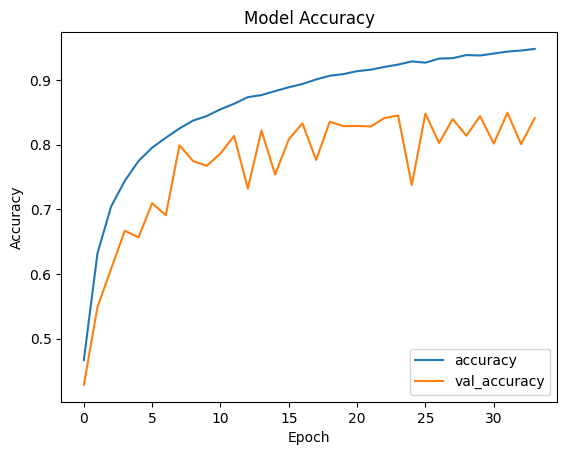

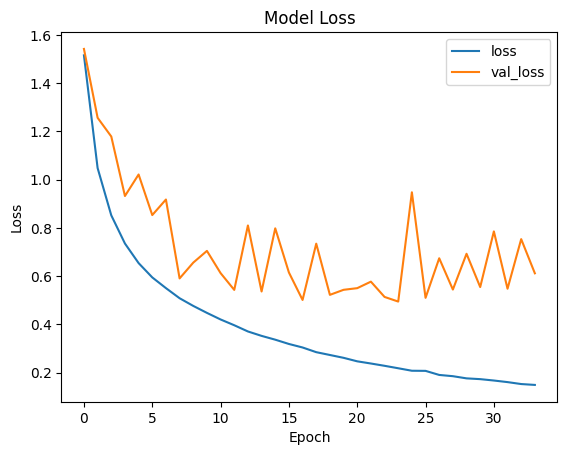

In [6]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()